# Objecctive:- We want to check the performance of data applying on principle component analysis(PCA)

In [2]:
#Importing useful libraries   
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

In [3]:
#Load the wine data
wine=pd.read_csv("D:\\Data sets\\wine.csv")

In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
##Drop the type column beacuse it have same attributes for all data
wine1=wine.drop("Type",axis=1)

In [6]:
#Our new dataset for performing analysis
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
wine1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine1.info()
#No null value is there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

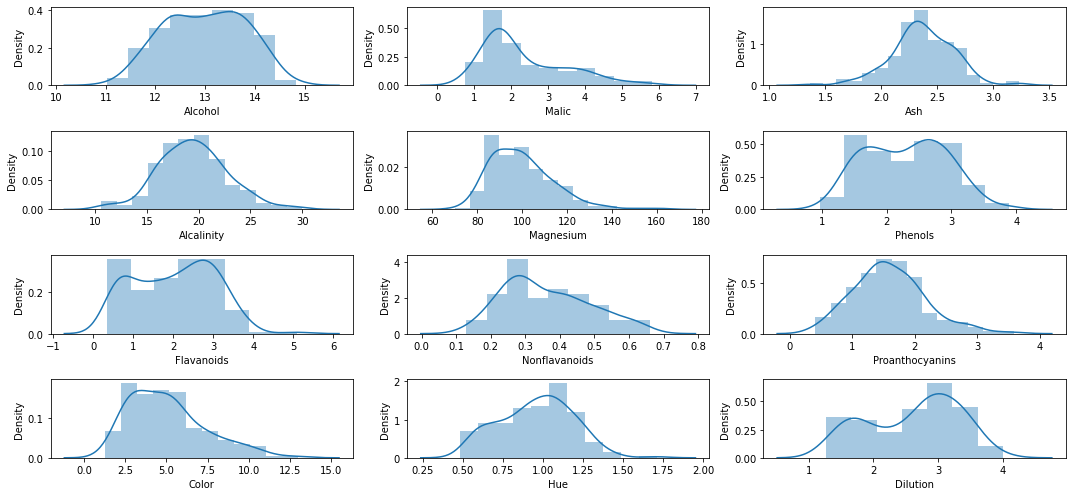

In [9]:
#We will visualise the distribution of data
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(wine.Alcohol, ax=ax[0,0])
sns.distplot(wine.Malic, ax=ax[0,1])
sns.distplot(wine.Ash, ax=ax[0,2])
sns.distplot(wine.Alcalinity, ax=ax[1,0])
sns.distplot(wine.Magnesium, ax=ax[1,1])
sns.distplot(wine.Phenols, ax=ax[1,2])
sns.distplot(wine.Flavanoids, ax=ax[2,0])
sns.distplot(wine.Nonflavanoids, ax=ax[2,1])
sns.distplot(wine.Proanthocyanins, ax=ax[2,2])
sns.distplot(wine.Color, ax=ax[3,0])
sns.distplot(wine.Hue  , ax=ax[3,1])
sns.distplot(wine.Dilution   , ax=ax[3,2])
plt.tight_layout()
plt.show()

C:\Users\Umanshu Mittal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Proline', ylabel='Density'>

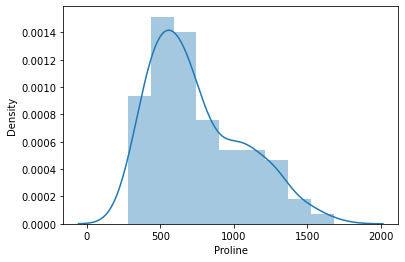

In [10]:
sns.distplot(wine.Proline)

In [11]:
# Normalizing the numerical data for apply the clustering
wine_normal = scale(wine1)

In [12]:
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# We will apply the different type of clustering without perform PCA

In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# First we will make the hierarchical cluster using of different type linkage  method

Text(0.5, 1.0, 'Dendogram')

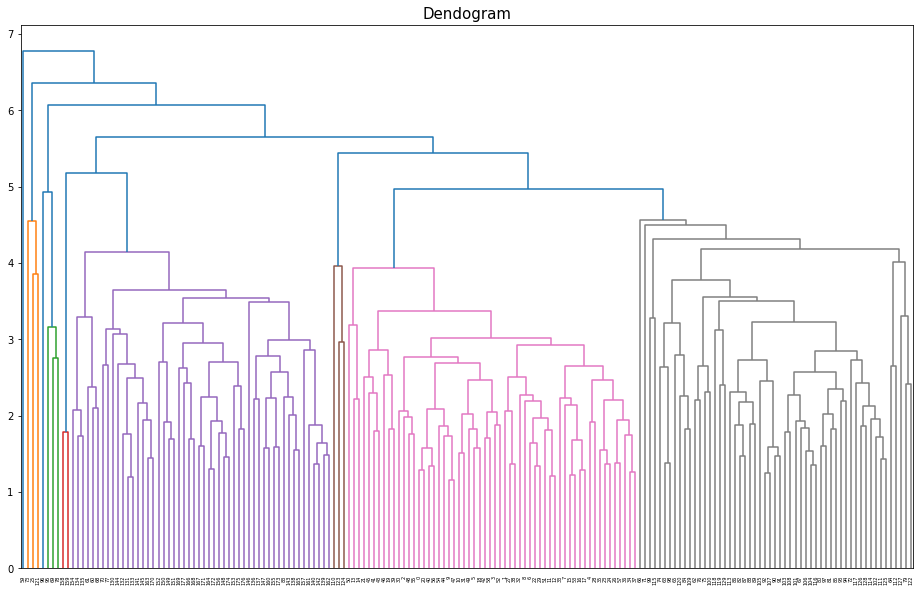

In [17]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_normal, method='average'))
plt.title("Dendogram",size=15)

In [18]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [19]:

y_hc1 = hc1.fit_predict(wine_normal)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [20]:
wine['cluster'] = y_hc1

In [21]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.500000,13.003879,1.996207,2.343017,18.665517,97.612069,2.568448,2.572069,0.322672,1.776379,4.27931,1.058879,3.017672,802.732759
1,1,2.888889,13.090185,3.181111,2.414815,21.087037,99.592593,1.697222,0.837778,0.455556,1.126852,6.99463,0.717148,1.710185,629.629630
2,2,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.31000,1.123333,3.463333,760.000000
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.95000,1.050000,1.820000,520.000000
4,4,2.000000,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.83750,1.112500,2.567500,757.500000


In [22]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 116

cluster 1
Total Members: 54

cluster 2
Total Members: 3

cluster 3
Total Members: 1

cluster 4
Total Members: 4



Text(0.5, 1.0, 'Dendogram')

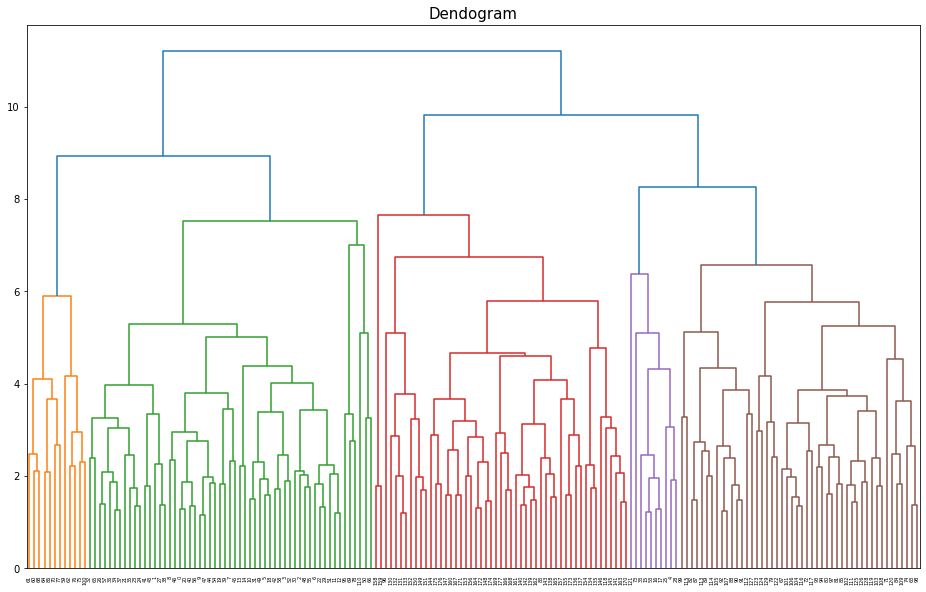

In [23]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_normal, method='complete'))
plt.title("Dendogram",size=15)

In [24]:
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [25]:

y_hc2 = hc2.fit_predict(wine_normal)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [26]:
wine['cluster'] = y_hc2

In [27]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
1,1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,2,2.000000,12.210000,2.008750,2.291250,20.981250,88.375000,2.317292,2.175417,0.363542,1.662917,2.848125,1.038333,2.958333,479.083333
3,3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000
4,4,1.200000,13.400000,1.899000,2.814000,21.770000,120.100000,2.941000,3.129000,0.383000,1.751000,5.355000,1.152000,3.075000,1026.000000


In [28]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 57

cluster 2
Total Members: 48

cluster 3
Total Members: 12

cluster 4
Total Members: 10



Text(0.5, 1.0, 'Dendogram')

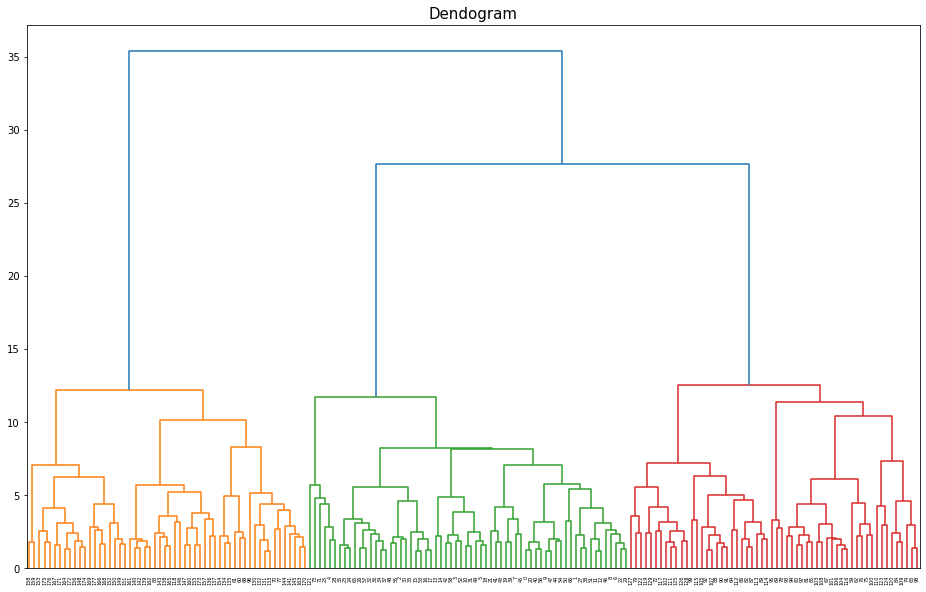

In [29]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_normal, method='ward'))
plt.title("Dendogram",size=15)

In [30]:
hc3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [31]:

y_hc3 = hc3.fit_predict(wine_normal)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [32]:
wine['cluster'] = y_hc3

In [33]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,1,2.857143,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158438,1076.046875


In [34]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 56

cluster 2
Total Members: 64



Text(0.5, 1.0, 'Dendogram')

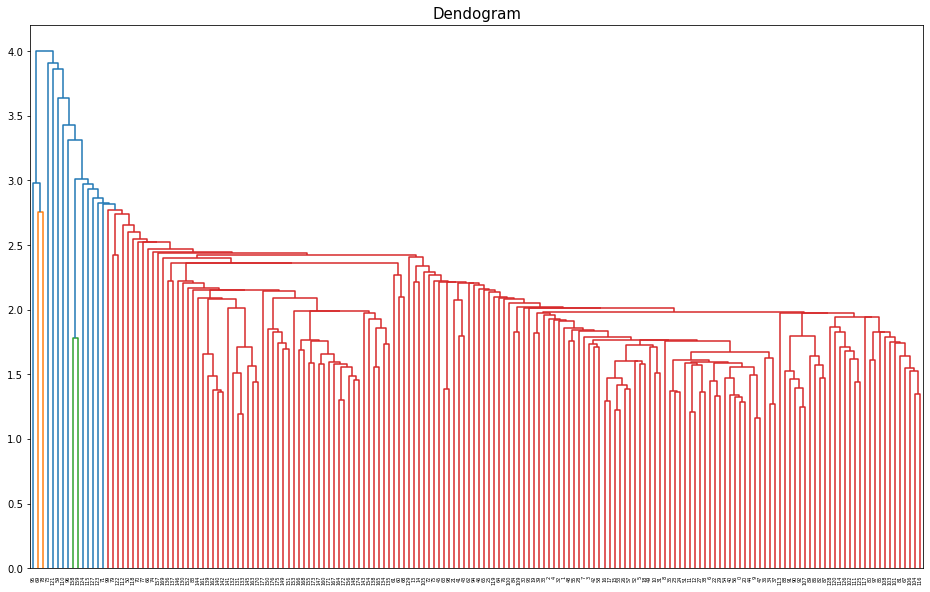

In [35]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_normal, method='single'))
plt.title("Dendogram",size=15)

In [36]:
hc4 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [37]:

y_hc4 = hc4.fit_predict(wine_normal)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [38]:
wine['cluster'] = y_hc4

In [39]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.937143,13.012000,2.355257,2.373371,19.540000,98.885714,2.298743,2.0332,0.363429,1.569371,5.094229,0.953863,2.610686,745.954286
1,1,2.000000,12.336667,1.233333,1.966667,16.866667,149.666667,2.083333,1.8000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667


In [40]:
for i in range(2):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 175

cluster 1
Total Members: 3



# Now we apply kmeans also

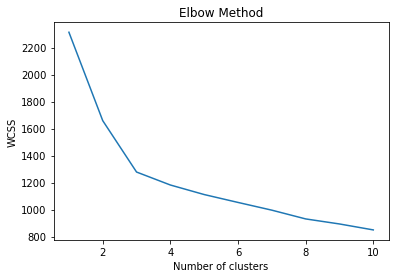

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_normal)

KMeans(n_clusters=3, random_state=42)

In [43]:
KM_label=clusters_new.labels_

In [44]:
wine['cluster'] = clusters_new.labels_

In [45]:
clusters_new.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [51]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [52]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 62

cluster 1
Total Members: 51

cluster 2
Total Members: 65



# Now will calculate the silhouette score for all clustering

In [53]:
from sklearn import metrics

In [278]:
SH_average=metrics.silhouette_score(wine_normal,y_hc1)

In [62]:
SH_Ward=metrics.silhouette_score(wine_normal,y_hc2)

In [63]:
SH_Complete=metrics.silhouette_score(wine_normal,y_hc3)

In [64]:
SH_Single=metrics.silhouette_score(wine_normal,y_hc4)

In [65]:
SH_Kmeans=metrics.silhouette_score(wine_normal,KM_label)

# Now we perform the PCA on the data 

In [221]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [222]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [223]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_normal)

In [224]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [225]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [226]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

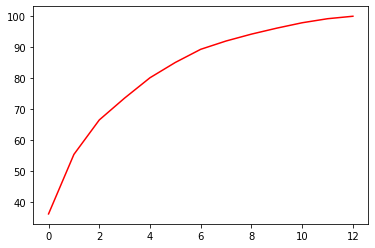

In [227]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [228]:
 wine_pca=pca_values[:,0:3]

# Now we will make the cluster by using first 3 PCs

Text(0.5, 1.0, 'Dendogram')

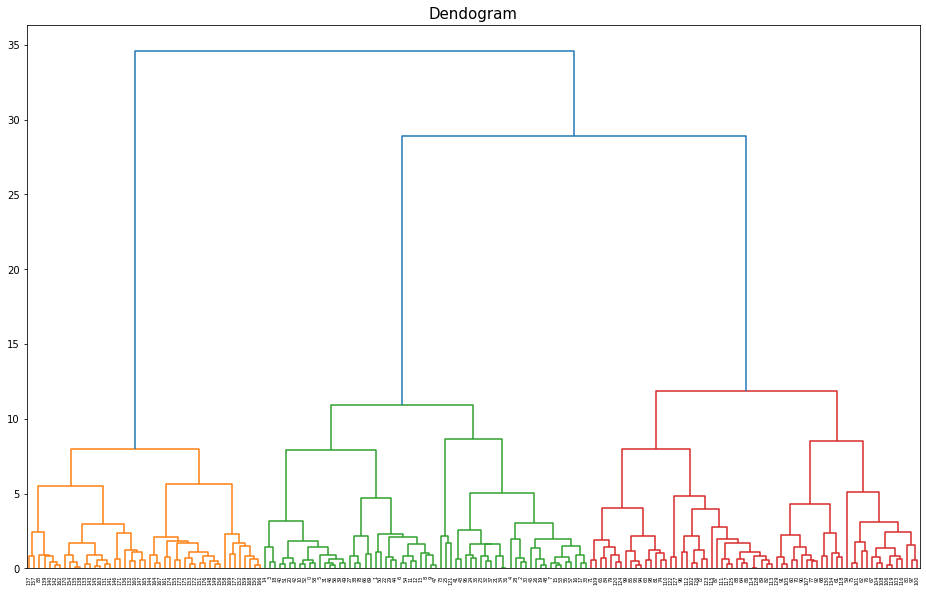

In [229]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='ward'))
plt.title("Dendogram",size=15)

In [230]:
hc1p = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [231]:

y_hc1p = hc1p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc1p,columns=['Clusters'])

In [232]:
wine['cluster'] = y_hc1p

In [233]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


In [234]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 66

cluster 1
Total Members: 47

cluster 2
Total Members: 65



Text(0.5, 1.0, 'Dendogram')

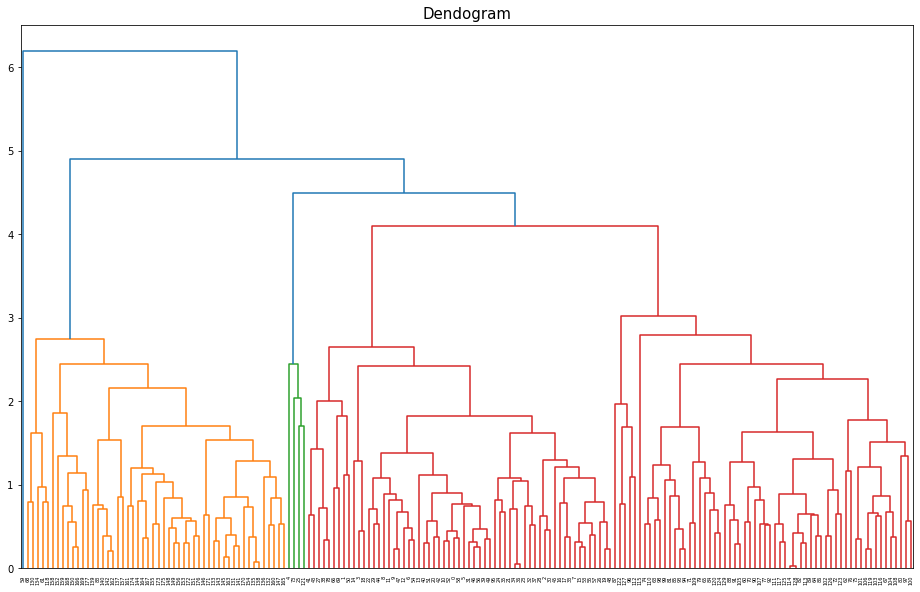

In [235]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='average'))
plt.title("Dendogram",size=15)

In [236]:
hc2p = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [237]:

y_hc2p = hc2p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc2p,columns=['Clusters'])

In [238]:
wine['cluster'] = y_hc2p

In [239]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.528926,12.956364,1.958347,2.333058,18.633884,99.371901,2.530826,2.514380,0.322231,1.787851,4.206612,1.063273,2.985785,802.396694
1,1,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000
2,2,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000


In [240]:
for i in range(4):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 121

cluster 1
Total Members: 4

cluster 2
Total Members: 52

cluster 3
Total Members: 1



Text(0.5, 1.0, 'Dendogram')

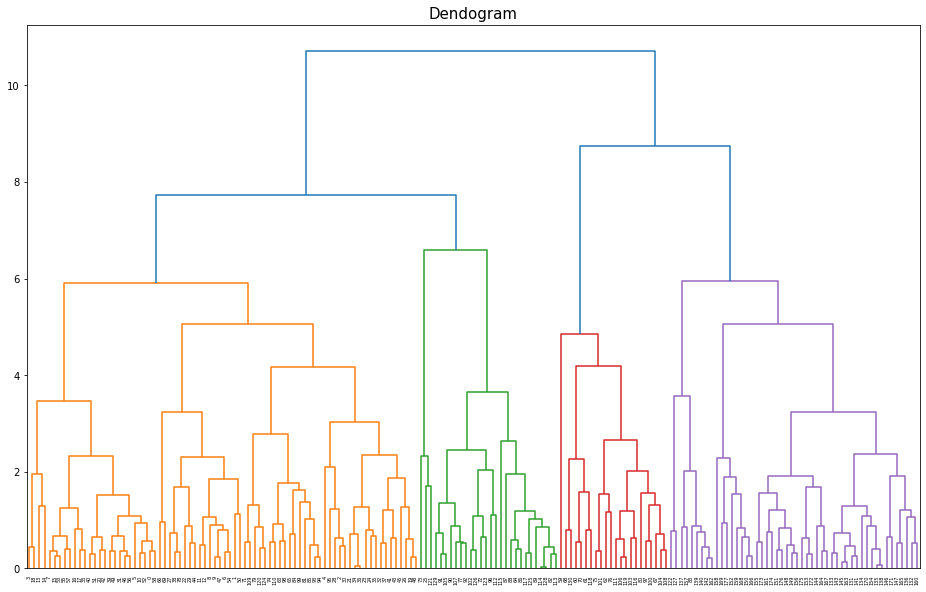

In [241]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='complete'))
plt.title("Dendogram",size=15)

In [242]:
hc3p = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [243]:

y_hc3p = hc3p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc3p,columns=['Clusters'])

In [244]:
wine['cluster'] = y_hc3p

In [245]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


In [246]:
for i in range(4):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 28

cluster 1
Total Members: 50

cluster 2
Total Members: 22

cluster 3
Total Members: 78



Text(0.5, 1.0, 'Dendogram')

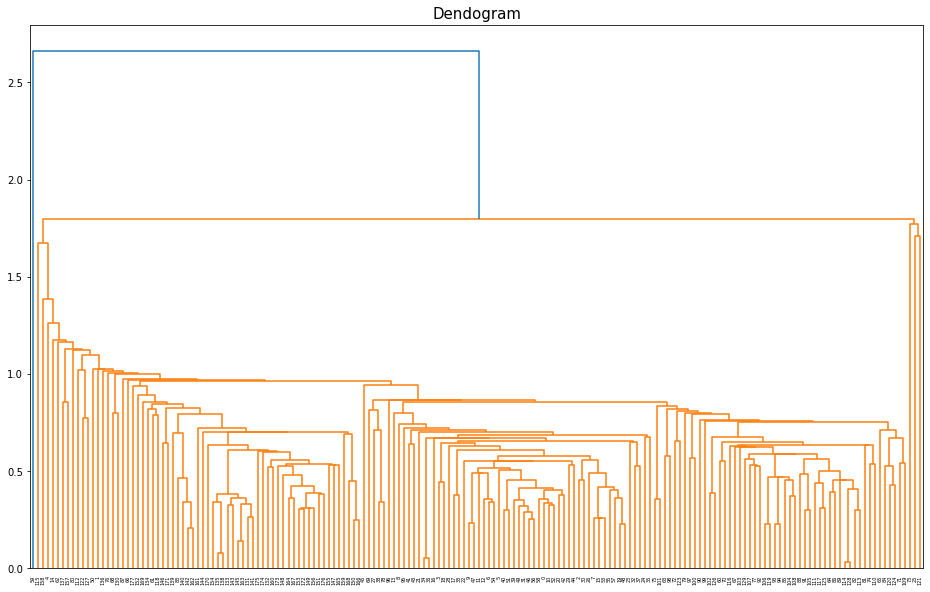

In [247]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='single'))
plt.title("Dendogram",size=15)

In [248]:
hc4p = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [249]:

y_hc4p = hc4p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc4p,columns=['Clusters'])

In [250]:
wine['cluster'] = y_hc4p

In [251]:
for i in range(2):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 177

cluster 1
Total Members: 1



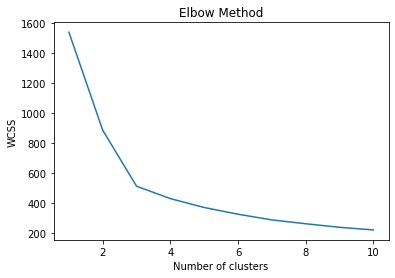

In [252]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [253]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_pca)

KMeans(n_clusters=3, random_state=42)

In [254]:
KM_pca_label=clusters_new.labels_

In [255]:
wine['cluster'] = clusters_new.labels_

In [256]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [257]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.063492,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095
2,2,2.000000,12.249062,1.910312,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125


In [258]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 63

cluster 2
Total Members: 64



# Now we will calculate the  silhouette score on pca clusters

In [259]:
from sklearn import metrics

In [273]:
SH_ward_PCA=metrics.silhouette_score(wine_pca,y_hc1p)

In [274]:
SH_average_PCA=metrics.silhouette_score(wine_pca,y_hc2p)

In [275]:
SH_complete_PCA=metrics.silhouette_score(wine_pca,y_hc3p)

In [276]:
SH_single_PCA=metrics.silhouette_score(wine_pca,y_hc4p)

In [277]:
SH_kmeans_PCA=metrics.silhouette_score(wine_pca,KM_pca_label)

# We will perform DBSCAN on PCA data

In [265]:
from sklearn.cluster import DBSCAN

In [266]:
dbscan = DBSCAN(eps=1.3, min_samples=16)
dbscan.fit(wine_pca)

DBSCAN(eps=1.3, min_samples=16)

In [267]:
dbscan.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  2, -1,  1,  1,  0, -1,  1,
        1, -1,  1, -1,  1, -1,  0,  1, -1,  1,  0,  1,  1,  0,  1,  2,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  1, -1,  1,  1,  2,
        1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  2,  2,  2,  2,  2,  2,
        2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2, -1], dtype=int64)

In [268]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [269]:
wine=pd.read_csv("D:\\Data sets\\wine.csv")

In [270]:
data=pd.concat([wine,cl],axis=1)
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [271]:
for i in range(-1,3):
    print("cluster", i)
    #print("The Members:",(list(data[data['cluster'] == i][''].values)))
    print("Total Members:", len(list(data[data['cluster'] == i]['Type'].values)))
    print()

cluster -1
Total Members: 24

cluster 0
Total Members: 64

cluster 1
Total Members: 46

cluster 2
Total Members: 44



In [272]:
print(metrics.silhouette_score(wine_pca,dbscan.labels_))

0.3866431900771192


In [280]:
##Silhouette_score for before using pca data
SH_average,SH_Ward,SH_Complete,SH_Single,SH_Kmeans

(0.22945756295901437,
 0.18836501623937577,
 0.2774439826952265,
 0.22245060727650925,
 0.2848589191898987)

In [279]:
##Silhouette_score for after using pca data
SH_ward_PCA,SH_average_PCA,SH_complete_PCA,SH_single_PCA,SH_kmeans_PCA

(0.44594921980629704,
 0.32173131311197706,
 0.35784842685673074,
 0.3631067305104137,
 0.4532351215683952)

# Conclusion:- I have analyse that before performing PCA the cluster result is similar to after performing PCA but we gain double  silhohuette score after applying PCA that means the complexity or overlaping of data is decreased after performing PCA
**Note:- I have applied DBSCAN on this data but not getting good result because the data is not dense **